In [95]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [96]:
X_train = pd.read_csv('data/train.csv', index_col='PassengerId')
X_test = pd.read_csv('data/test.csv', index_col='PassengerId')
X_train.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
407,0,3,"Widegren, Mr. Carl/Charles Peter",male,51.0,0,0,347064,7.7500,NaN,S
520,0,3,"Pavlovic, Mr. Stefo",male,32.0,0,0,349242,7.8958,NaN,S
432,1,3,"Thorneycroft, Mrs. Percival (Florence Kate White)",female,NaN,1,0,376564,16.1000,NaN,S
347,1,2,"Smith, Miss. Marion Elsie",female,40.0,0,0,31418,13.0000,NaN,S


In [97]:
X_test.sample(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1063,3,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C
1222,2,"Davies, Mrs. John Morgan (Elizabeth Agnes Mary...",female,48.0,0,2,C.A. 33112,36.7500,NaN,S
1194,2,"Phillips, Mr. Escott Robert",male,43.0,0,1,S.O./P.P. 2,21.0000,NaN,S
998,3,"Buckley, Mr. Daniel",male,21.0,0,0,330920,7.8208,NaN,Q
1184,3,"Nasr, Mr. Mustafa",male,NaN,0,0,2652,7.2292,NaN,C


In [98]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [99]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [100]:
X_train['Age'] = X_train.Age.fillna(X_train.Age.median())
X_test['Age'] = X_test.Age.fillna(X_train.Age.median())

In [101]:
X_train['Cabin'] = X_train.Cabin.fillna('неизвестно')
X_test['Cabin'] = X_test.Cabin.fillna('неизвестно')

In [102]:
X_train['cabin_type'] = X_train.Cabin.apply(lambda x: x[0])
X_test['cabin_type'] = X_test.Cabin.apply(lambda x: x[0])

In [103]:
X_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [104]:
X_train['Embarked'] = X_train.Embarked.fillna("S")
X_test['Fare'] = X_test.Fare.fillna(X_train.Fare.median())

In [105]:
X_train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin         0
Embarked      0
cabin_type    0
dtype: int64

In [106]:
X_test.isna().sum()

Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin         0
Embarked      0
cabin_type    0
dtype: int64

In [107]:
X_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_type
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,неизвестно,S,н
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,неизвестно,S,н
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,неизвестно,S,н
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,неизвестно,S,н
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,неизвестно,S,н


In [108]:
X_test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_type
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,неизвестно,Q,н
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,неизвестно,S,н
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,неизвестно,Q,н
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,неизвестно,S,н
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,неизвестно,S,н
...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,неизвестно,S,н
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,неизвестно,S,н


In [109]:
X_train.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
X_test.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [110]:
X_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_type
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,н
2,1,1,female,38.0,1,0,71.2833,C,C
3,1,3,female,26.0,0,0,7.9250,S,н
4,1,1,female,35.0,1,0,53.1000,S,C
5,0,3,male,35.0,0,0,8.0500,S,н
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S,н
888,1,1,female,19.0,0,0,30.0000,S,B
889,0,3,female,28.0,1,2,23.4500,S,н


In [111]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_type
PassengerId,,,,,,,,
892,3,male,34.5,0,0,7.8292,Q,н
893,3,female,47.0,1,0,7.0000,S,н
894,2,male,62.0,0,0,9.6875,Q,н
895,3,male,27.0,0,0,8.6625,S,н
896,3,female,22.0,1,1,12.2875,S,н
...,...,...,...,...,...,...,...,...
1305,3,male,28.0,0,0,8.0500,S,н
1306,1,female,39.0,0,0,108.9000,C,C
1307,3,male,38.5,0,0,7.2500,S,н


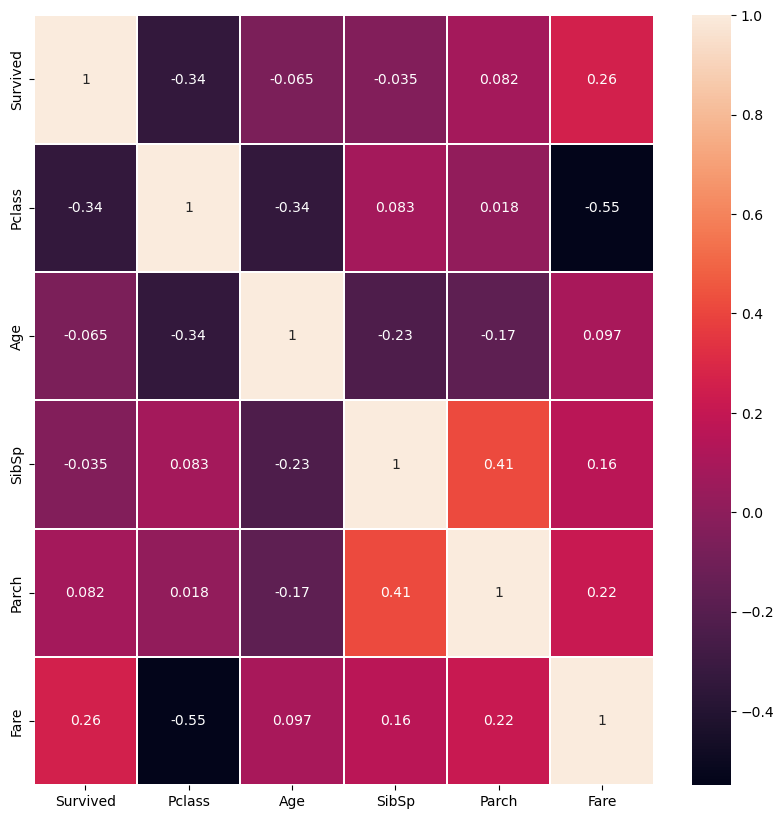

In [112]:
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(X_train.corr(numeric_only=True),annot=True,linewidths=.1)
plt.show()

In [113]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
for feut in ('Embarked', 'Sex', 'cabin_type'):
    le.fit(X_train[feut])
    X_train[feut] = le.transform(X_train[feut])
    X_test[feut] = le.transform(X_test[feut])

In [114]:
X_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_type
PassengerId,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2,8
2,1,1,0,38.0,1,0,71.2833,0,2
3,1,3,0,26.0,0,0,7.9250,2,8
4,1,1,0,35.0,1,0,53.1000,2,2
5,0,3,1,35.0,0,0,8.0500,2,8
...,...,...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,13.0000,2,8
888,1,1,0,19.0,0,0,30.0000,2,1
889,0,3,0,28.0,1,2,23.4500,2,8


In [115]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_type
PassengerId,,,,,,,,
892,3,1,34.5,0,0,7.8292,1,8
893,3,0,47.0,1,0,7.0000,2,8
894,2,1,62.0,0,0,9.6875,1,8
895,3,1,27.0,0,0,8.6625,2,8
896,3,0,22.0,1,1,12.2875,2,8
...,...,...,...,...,...,...,...,...
1305,3,1,28.0,0,0,8.0500,2,8
1306,1,0,39.0,0,0,108.9000,0,2
1307,3,1,38.5,0,0,7.2500,2,8


In [116]:
X_train.to_csv("data/X_train.csv")
X_test.to_csv("data/X_test.csv")